# Import Package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from simpledbf import Dbf5
import seaborn as sns
import numpy as np

%matplotlib inline

# Import Data

In [2]:
# import dbf data
dbf = Dbf5("Data Sets/UNISYS_tracks_1956_2018Dec31.dbf") 

# Convert into Data frame
data = dbf.to_dataframe() 

In [6]:
# First 5 data in the data set
data.head(10) 

,REGION,STORM_NO,NAME,ADVISORY,ADV_DATE,ADV_HOUR,SPEED,PRESSURE,TYPE,LAT,LONG_
0,S,0,1997-12-02,0,1997-12-03,18,25,0,D,-8.6,0.0
1,I,0,1979-02-11,0,1979-02-11,12,-999,0,D,-16.4,0.0
2,A,6,FIFI,0,1958-09-06,6,65,0,S,15.6,-55.7
3,A,6,FRANCES,0,2004-09-02,0,120,939,H,22.2,-71.4
4,A,3,UNNAMED,0,1948-09-03,0,40,0,S,53.8,-50.0
5,A,9,HELENE,0,1988-09-27,18,77,979,H,30.9,-51.9
6,I,0,1966-01-02,0,1966-01-04,12,-999,0,D,-13.7,0.0
7,A,3,CINDY,0,2005-07-09,6,25,1009,D,40.8,-70.7
8,I,0,1992-04-04,0,1992-04-06,18,40,0,S,-10.3,0.0
9,S,0,1963-01-29,0,1963-01-30,18,-999,0,D,-20.1,0.0


In [7]:
data.shape

(227574, 11)

In [4]:
# Check Missing data and data types of all collumn 
def check_missing_data(data):
    # Check how many data is missing in every collumn
    total = data.isnull().sum()
    
    # percentage of missing data of every collumn
    percent = total/data.isnull().count() * 100
    
    # Create a table
    table = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    
    # Check data type of every column  and fit it in the table
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
        
    table["Types"] = types
    
    #  Transpose the table
    table = np.transpose(table)
        
    return table

In [23]:
check_missing_data(data)

,REGION,STORM_NO,NAME,ADVISORY,ADV_DATE,ADV_HOUR,SPEED,PRESSURE,TYPE,LAT,LONG_
Total,0,0,0,0,68,0,0,0,11,0,0
Percent,0,0,0,0,0.0298804,0,0,0,0.00483359,0,0
Types,object,int64,object,int64,object,int64,int64,int64,object,float64,float64


In [4]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227574 entries, 0 to 227573
Data columns (total 11 columns):
REGION      227574 non-null object
STORM_NO    227574 non-null int64
NAME        227574 non-null object
ADVISORY    227574 non-null int64
ADV_DATE    227506 non-null object
ADV_HOUR    227574 non-null int64
SPEED       227574 non-null int64
PRESSURE    227574 non-null int64
TYPE        227563 non-null object
LAT         227574 non-null float64
LONG_       227574 non-null float64
dtypes: float64(2), int64(5), object(4)
memory usage: 19.1+ MB


# Data cleaning

In [13]:
cleaned_data = data.dropna()

In [14]:
cleaned_data.head()

,REGION,STORM_NO,NAME,ADVISORY,ADV_DATE,ADV_HOUR,SPEED,PRESSURE,TYPE,LAT,LONG_
0,S,0,1997-12-02,0,1997-12-03,18,25,0,D,-8.6,0.0
1,I,0,1979-02-11,0,1979-02-11,12,-999,0,D,-16.4,0.0
2,A,6,FIFI,0,1958-09-06,6,65,0,S,15.6,-55.7
3,A,6,FRANCES,0,2004-09-02,0,120,939,H,22.2,-71.4
4,A,3,UNNAMED,0,1948-09-03,0,40,0,S,53.8,-50.0


In [15]:
cleaned_data.shape

(227495, 11)

In [16]:
cleaned_data.isnull().sum()

REGION      0
STORM_NO    0
NAME        0
ADVISORY    0
ADV_DATE    0
ADV_HOUR    0
SPEED       0
PRESSURE    0
TYPE        0
LAT         0
LONG_       0
dtype: int64

In [21]:
cleaned_data["REGION"].unique()

array(['S', 'I', 'A', 'W', 'E'], dtype=object)

In [19]:
cleaned_data["REGION"].value_counts()

A    97262
W    52100
I    38434
E    21955
S    17744
Name: REGION, dtype: int64

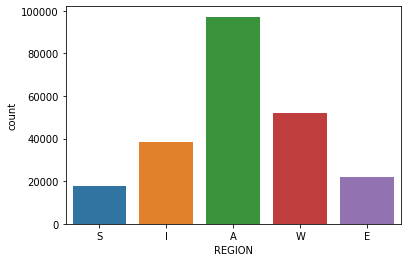

In [40]:
sns.countplot(x="REGION",data=cleaned_data)

In [25]:
# Convert ADV_DATE column object to date time
cleaned_data["ADV_DATE"] = pd.to_datetime(cleaned_data["ADV_DATE"])

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
cleaned_data["ADV_DATE"].dtypes

dtype('<M8[ns]')

In [27]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227495 entries, 0 to 227573
Data columns (total 11 columns):
REGION      227495 non-null object
STORM_NO    227495 non-null int64
NAME        227495 non-null object
ADVISORY    227495 non-null int64
ADV_DATE    227495 non-null datetime64[ns]
ADV_HOUR    227495 non-null int64
SPEED       227495 non-null int64
PRESSURE    227495 non-null int64
TYPE        227495 non-null object
LAT         227495 non-null float64
LONG_       227495 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 30.8+ MB


**Create new columns**

In [36]:
year = cleaned_data["ADV_DATE"].apply(lambda y:y.year)
month = cleaned_data["ADV_DATE"].apply(lambda m:m.month)


In [37]:
cleaned_data["Year"] = year
cleaned_data["Month"] = month

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
cleaned_data.head()

,REGION,STORM_NO,NAME,ADVISORY,ADV_DATE,ADV_HOUR,SPEED,PRESSURE,TYPE,LAT,LONG_,Year,Month
0,S,0,1997-12-02,0,1997-12-03,18,25,0,D,-8.6,0.0,1997,12
1,I,0,1979-02-11,0,1979-02-11,12,-999,0,D,-16.4,0.0,1979,2
2,A,6,FIFI,0,1958-09-06,6,65,0,S,15.6,-55.7,1958,9
3,A,6,FRANCES,0,2004-09-02,0,120,939,H,22.2,-71.4,2004,9
4,A,3,UNNAMED,0,1948-09-03,0,40,0,S,53.8,-50.0,1948,9


In [39]:
cleaned_data["Month"].unique()

array([12,  2,  9,  1,  7,  4,  8, 10,  6,  3, 11,  5], dtype=int64)

In [41]:
# Map Month into name
dmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [42]:
cleaned_data["Month"] = cleaned_data["Month"].map(dmap)

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
cleaned_data["Month"].value_counts()

Sep    56899
Aug    39042
Oct    31211
Jul    18337
Nov    14795
Jan    12489
Feb    11256
Dec    10703
Mar    10443
Jun    10030
Apr     6356
May     5934
Name: Month, dtype: int64

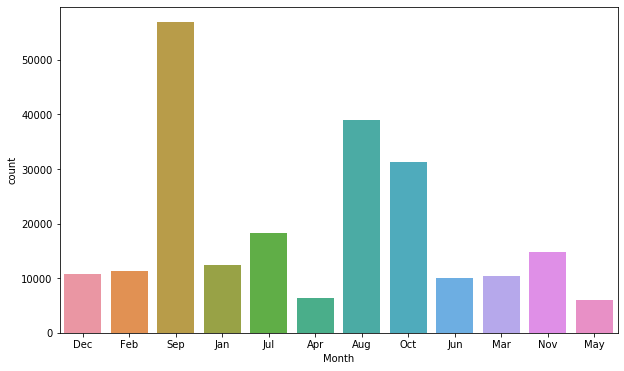

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(x="Month",data=cleaned_data)

In [52]:
cleaned_data.groupby(["Month","REGION"]).count()

STORM_NO   NAME  ADVISORY  ADV_DATE  ADV_HOUR  SPEED  PRESSURE  \
Month REGION                                                                   
Apr   A            217    217       217       217       217    217       217   
      E             20     20        20        20        20     20        20   
      I           2751   2751      2751      2751      2751   2751      2751   
      S           1771   1771      1771      1771      1771   1771      1771   
      W           1597   1597      1597      1597      1597   1597      1597   
Aug   A          22560  22560     22560     22560     22560  22560     22560   
      E           5704   5704      5704      5704      5704   5704      5704   
      I            873    873       873       873       873    873       873   
      S             59     59        59        59        59     59        59   
      W           9846   9846      9846      9846      9846   9846      9846   
Dec   A            875    875       875       875       875    875       875   
      E            255    255       255       255       255    255       255   
      I           4900   4900      4900      4900      4900   4900      4900   
      S           1849   1849      1849      1849      1849   1849      1849   
      W           2824   2824      2824      2824      2824   2824      2824   
Feb   A             60     60        60        60        60     60        60   
      E             66     66        66        66        66     66        66   
      I           6627   6627      6627      6627      6627   6627      6627   
      S           4208   4208      4208      4208      4208   4208      4208   
      W            295    295       295       295       295    295       295   
Jan   A            256    256       256       256       256    256       256   
      E            118    118       118       118       118    118       118   
      I           6980   6980      6980      6980      6980   6980      6980   
      S           4174   4174      4174      4174      4174   4174      4174   
      W            961    961       961       961       961    961       961   
Jul   A           5989   5989      5989      5989      5989   5989      5989   
      E           4285   4285      4285      4285      4285   4285      4285   
      I            849    849       849       849       849    849       849   
      S            109    109       109       109       109    109       109   
      W           7105   7105      7105      7105      7105   7105      7105   
Jun   A           3796   3796      3796      3796      3796   3796      3796   
      E           2007   2007      2007      2007      2007   2007      2007   
      I           1057   1057      1057      1057      1057   1057      1057   
      S            187    187       187       187       187    187       187   
      W           2983   2983      2983      2983      2983   2983      2983   
Mar   E             10     10        10        10        10     10        10   
      I           5267   5267      5267      5267      5267   5267      5267   
      S           4173   4173      4173      4173      4173   4173      4173   
      W            993    993       993       993       993    993       993   
May   A           1110   1110      1110      1110      1110   1110      1110   
      E            456    456       456       456       456    456       456   
      I           1706   1706      1706      1706      1706   1706      1706   
      S            329    329       329       329       329    329       329   
      W           2333   2333      2333      2333      2333   2333      2333   
Nov   A           4605   4605      4605      4605      4605   4605      4605   
      E            742    742       742       742       742    742       742   
      I           3596   3596      3596      3596      3596   3596      3596   
      S            692    692       692       692       692    692       692   
      W       

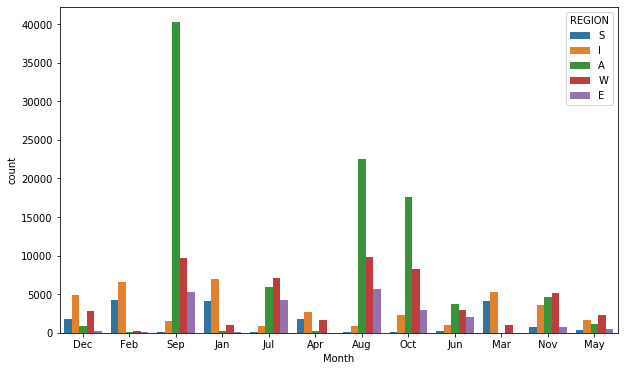

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(x="Month",data=cleaned_data,hue="REGION")